<a href="https://colab.research.google.com/github/cpvivek/Coronary-Heart-Disease-Risk-Prediction/blob/main/Capstone_Project_ML_Classification_Cardiovascular_Disease_Risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Capstone Project: Classification - Cardiovascular disease risk prediction. 

The objective of the project would be to predict whether a patient is under risk of contracting coronory heart disease (CHD) in the next 10 years, given the data about following 14 attributes:


• Sex: male or female("M" or "F")

• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to
whole numbers, the concept of age is continuous)

Behavioral

• is_smoking: whether or not the patient is a current smoker ("YES" or "NO")

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)

Medical( history)

• BP Meds: whether or not the patient was on blood pressure medication (Nominal)

• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

• Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)

• Tot Chol: total cholesterol level (Continuous)

• Sys BP: systolic blood pressure (Continuous)

• Dia BP: diastolic blood pressure (Continuous)

• BMI: Body Mass Index (Continuous)

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in
fact discrete, yet are considered continuous because of large number of possible values.)

• Glucose: glucose level (Continuous)

We have over 4000 data entries to help develop our model. 


#Dataset

Let's look into the data we have in hand.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
df=pd.read_csv('/content/drive/MyDrive/Alma Better Pro/Alma Better Pro Program/Capstone Projects/Capstone_ML_Classification_Cardiovascular risk/cardiovascular_risk.csv')

In [23]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [24]:
df.shape

(3390, 17)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

We can see some null values in the dataset which needs to be dealt with.

In [8]:
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


#Null value clean-up

Following are the fields null values were detected in:

1. education: Categorical variable, indicating the level of education:

  1=0-11 years

  2=High School Diploma, GED

  3=Some College, Vocational School

  4=College (BS, BA) degree or more

  Null values shall be replaced with mode

2. cigsPerDay: Continuos variable indicating number of cigarettes smoked in a day. Null values shall be replaced by median.

3. BPmeds: Categorical Field (0/1) indicating use of Anti-hypertensive medication at exam. If the value is missing here, we shall assume that the patient isn't under the medication. 

4. totChol: Continuos variable indicating Serum Total Cholesterol (mg/dL). Null values shall be replaced with median here.

5. BMI: Contiuos variable indicating BMI of the patient. Null values shall be replaced by median.

6. heartrate: Continuos variable indicating heart rate (Ventricular rate) in
beats/min. Null values to be replaced by median.

7. glucose: Continuous variable indicating Casual serum glucose (mg/dL). Null values to be replaced by median.

In [32]:
df['education'].fillna(df.education.mode(),inplace=True)
df['cigsPerDay'].fillna(df.cigsPerDay.median(),inplace=True)
df['BPMeds'].fillna(0,inplace=True)
df['totChol'].fillna(df.totChol.median(),inplace=True)
df['BMI'].fillna(df.BMI.median(),inplace=True)
df['heartRate'].fillna(df.heartRate.median(),inplace=True)
df['glucose'].fillna(df.glucose.median(),inplace=True)


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3390 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3390 non-null   float64
 6   BPMeds           3390 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3390 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3390 non-null   float64
 14  heartRate        3390 non-null   float64
 15  glucose          3390 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

The dataset doesn't have null values anymore. We can proceed towards EDA now.

#EDA
Let's dive deep into the dataset to gain better understanding.

## Distribution of active risk cases across ages. 

In [9]:
age_risk=df.groupby('age')['TenYearCHD'].sum().reset_index() #counting number of people having risk of CHD by age.
age_risk

,age,TenYearCHD
0,32,0
1,33,0
2,34,0
3,35,2
4,36,3
5,37,2
6,38,7
7,39,5
8,40,11
9,41,11


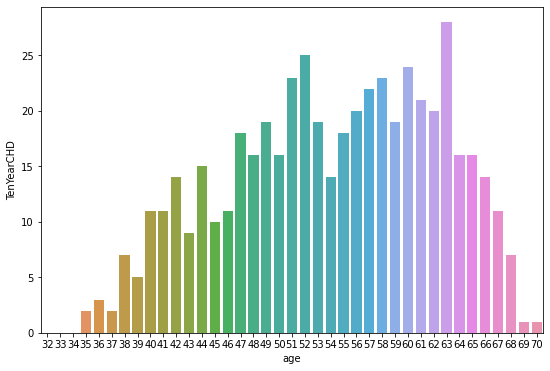

In [10]:
plt.figure(figsize=(9,6))
sns.barplot(x=age_risk.age,y=age_risk.TenYearCHD)

Remarks:
The highest number of people facing the risk of CHD are of the age 63.
Let's further break this down by gender.

In [42]:
sex_risk=df.groupby('sex')['TenYearCHD'].sum()
sex_risk

sex
F    239
M    272
Name: TenYearCHD, dtype: int64

We see that ratio of male and females facing the risk of CHD are quite equally proportionate.

In [43]:
#Lookign into CHD risk by gender, grouped by age.
male_risk=df[df.sex=='M'].groupby('age')['TenYearCHD'].sum().reset_index()
female_risk=df[df.sex=='F'].groupby('age')['TenYearCHD'].sum().reset_index()

Text(0.5, 1.0, 'Number of males facing risk of CHD by age')

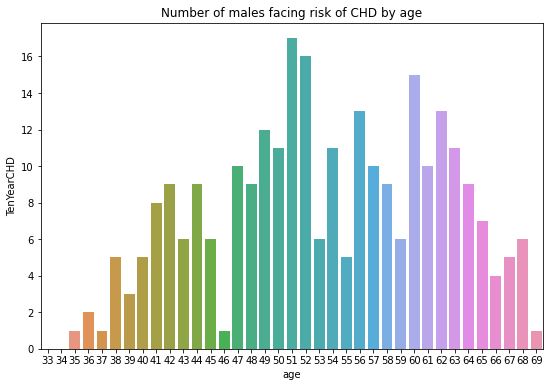

In [44]:
plt.figure(figsize=(9,6))
sns.barplot(x=male_risk.age,y=male_risk.TenYearCHD)
plt.title('Number of males facing risk of CHD by age')

Text(0.5, 1.0, 'Number of females facing risk of CHD by age')

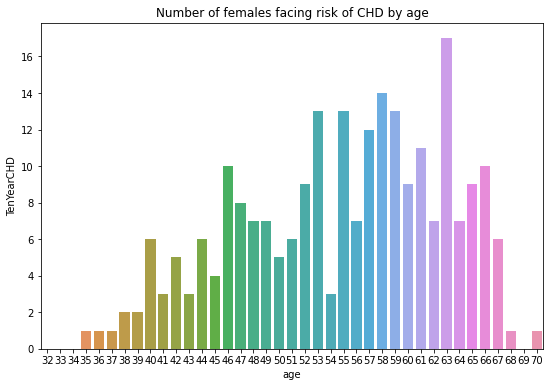

In [45]:
plt.figure(figsize=(9,6))
sns.barplot(x=female_risk.age,y=female_risk.TenYearCHD)
plt.title('Number of females facing risk of CHD by age')

Remarks:

Males of age 51 and females of age 63 have the highest count of CHD risk.

sex
F    239
M    272
Name: TenYearCHD, dtype: int64